# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 10

### Zadanie 1

W okolicy znajdują się **trzy obozy**. Nie znamy liczby uczestników, ale posiadamy dane o ich zamówieniach na dwa produkty:

- **woda** (w litrach),  
- **kawa** (w sztukach).


1. Wyświetl dane na wykresie punktowym, gdzie:
   - oś **X** przedstawia zamówienia na **wodę**,
   - oś **Y** przedstawia zamówienia na **kawę**.  
   Każdy obóz powinien być reprezentowany jako punkt na wykresie.

2. **Dodaj linie** prowadzące z punktu **(0, 0)** do każdego z punktów reprezentujących obozy.

3. **Oblicz** między każdą parą obozów:
   - **odległości [Euklidesowe](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)**,
   - **odległości [kosinusowe](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html)**.

4. **Wskaż parę obozów najbardziej podobnych do siebie** (na podstawie jednej lub obu metryk).

Dane wejściowe:


| Nazwa obozu     | Zamówienia na wodę (w l.) | Zamówienia na kawę (w szt.) |
| :---            | ---                       | --- |
| Obóz sportowy 1 | 200 | 25  |
| Obóz sportowy 2 | 900 | 80  |
| Obóz szachowy   | 300 | 120 |



--------------------------------------------------
Euclidean: 
Pod wzgledem kawy najbardziej podobne obozy to: Oboz sportowy 2 i Oboz szachowy
Pod wzgledem wody najbardziej podobne obozy to: Oboz sportowy 1 i Oboz szachowy
Pod wzgledem zarowno kawy jak i wody najbardziej podobne obozy to: Oboz sportowy 1 i Oboz szachowy
--------------------------------------------------
Cosine: 
Pod wzgledem kawy najbardziej podobne obozy to: Oboz sportowy 1 i Oboz sportowy 2
Pod wzgledem wody najbardziej podobne obozy to: Oboz sportowy 1 i Oboz sportowy 2
Pod wzgledem zarowno kawy jak i wody najbardziej podobne obozy to: Oboz sportowy 1 i Oboz szachowy


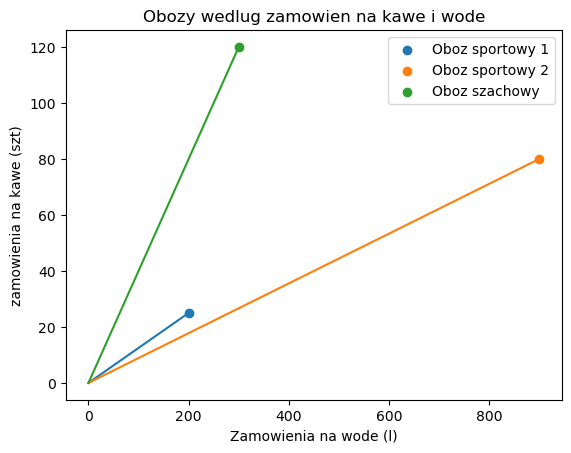

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Data creation
columns = ['Nazwa obozu', 'Zamowienia na wode (l)', 'Zamowienia na kawe (szt)']
data = [['Oboz sportowy 1', 200, 25],
        ['Oboz sportowy 2', 900, 80],
        ['Oboz szachowy', 300, 120] ]

df = pd.DataFrame(data = data, columns = columns)


#Plot
plt.title("Obozy wedlug zamowien na kawe i wode")
for i in range(len(df)):
    plt.scatter(df['Zamowienia na wode (l)'][i], df['Zamowienia na kawe (szt)'][i], label = df['Nazwa obozu'][i])
    plt.plot([0,df['Zamowienia na wode (l)'][i]], [0,df['Zamowienia na kawe (szt)'][i]] )
    
plt.xlabel('Zamowienia na wode (l)')
plt.ylabel('zamowienia na kawe (szt)')
plt.legend()



from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
import itertools

pairs = list(itertools.combinations(range(len(df)), 2))

print("--------------------------------------------------")
print("Euclidean: ")
#Kawa
best_pair = None
best_distance = np.inf
for p in pairs:
    p0 = [df['Zamowienia na kawe (szt)'][p[0]]]
    p1 = [df['Zamowienia na kawe (szt)'][p[1]]]
    distance = euclidean( p0, p1 )
    if distance < best_distance:
        best_distance = distance
        best_pair = p

print(f"Pod wzgledem kawy najbardziej podobne obozy to: {df['Nazwa obozu'][best_pair[0]]} i {df['Nazwa obozu'][best_pair[1]]}")        
        
#Woda
best_pair = None
best_distance = np.inf
for p in pairs:
    p0 = [df['Zamowienia na wode (l)'][p[0]]]
    p1 = [df['Zamowienia na wode (l)'][p[1]]]
    distance = euclidean( p0, p1 )
    if distance < best_distance:
        best_distance = distance
        best_pair = p

print(f"Pod wzgledem wody najbardziej podobne obozy to: {df['Nazwa obozu'][best_pair[0]]} i {df['Nazwa obozu'][best_pair[1]]}")        
        
#Kawa i woda
best_pair = None
best_distance = np.inf
for p in pairs:
    p0 = [df['Zamowienia na wode (l)'][p[0]] , df['Zamowienia na kawe (szt)'][p[0]]]
    p1 = [df['Zamowienia na wode (l)'][p[1]] , df['Zamowienia na kawe (szt)'][p[0]]]
    distance = euclidean( p0, p1 )
    if distance < best_distance:
        best_distance = distance
        best_pair = p

print(f"Pod wzgledem zarowno kawy jak i wody najbardziej podobne obozy to: {df['Nazwa obozu'][best_pair[0]]} i {df['Nazwa obozu'][best_pair[1]]}")        
        
print("--------------------------------------------------")
print("Cosine: ")
#Kawa
best_pair = None
best_distance = np.inf
for p in pairs:
    p0 = [df['Zamowienia na kawe (szt)'][p[0]]]
    p1 = [df['Zamowienia na kawe (szt)'][p[1]]]
    distance = cosine( p0, p1 )
    if distance < best_distance:
        best_distance = distance
        best_pair = p

print(f"Pod wzgledem kawy najbardziej podobne obozy to: {df['Nazwa obozu'][best_pair[0]]} i {df['Nazwa obozu'][best_pair[1]]}")        
        
#Woda
best_pair = None
best_distance = np.inf
for p in pairs:
    p0 = [df['Zamowienia na wode (l)'][p[0]]]
    p1 = [df['Zamowienia na wode (l)'][p[1]]]
    distance = cosine( p0, p1 )
    if distance < best_distance:
        best_distance = distance
        best_pair = p

print(f"Pod wzgledem wody najbardziej podobne obozy to: {df['Nazwa obozu'][best_pair[0]]} i {df['Nazwa obozu'][best_pair[1]]}")        
        
#Kawa i woda
best_pair = None
best_distance = np.inf
for p in pairs:
    p0 = [df['Zamowienia na wode (l)'][p[0]] , df['Zamowienia na kawe (szt)'][p[0]]]
    p1 = [df['Zamowienia na wode (l)'][p[1]] , df['Zamowienia na kawe (szt)'][p[0]]]
    distance = cosine( p0, p1 )
    if distance < best_distance:
        best_distance = distance
        best_pair = p

print(f"Pod wzgledem zarowno kawy jak i wody najbardziej podobne obozy to: {df['Nazwa obozu'][best_pair[0]]} i {df['Nazwa obozu'][best_pair[1]]}")        
     

### Zadanie 2

#### A)

Mamy dane dotyczące kilku parków narodowych. Chcielibyśmy wykorzystać poznane w poprzednim zadaniu miary podobieństwa w celu odnalezienia najbardziej podobnych parków na podstawie pewnych szacunkowych pomiarów liczby drzew (iglastych i liściastych) oraz populacji kilku gatunków zwierząt. 

  

1. Dla każdej pary parków oblicz odległość Euklidesową i kosinusową. 
2. Wskaż parę najbardziej podobnych parków (dla każdej metryki osobno).  
4. Na podstawie uzyskanych wyników odpowiedz na pytanie która miara lepiej oddaje podobieństwo między parkami? Uzasadnij swoją opinię.
5. Znajdź park najbardziej podobny do Tatrzańskiego Parku Narodowego? 

Szacunkowe dane:

| Nazwa                                       | Liczba drzew iglastych | Liczba drzew liściastych | Liczba dzików | Liczba wilków | Liczba niedźwiedzi | Liczba jeleni |
| ---                                         | ---      | ---    |--- |--- | --- | ---  |
|Tatrzański Park Narodowy (Polska)            |   1000000|  200000|  90|  75|   50|  1200|
|Białowieski Park Narodowy (Polska)           |    250000| 1100000| 250|  40|    0|  1000|
|Yellowstone National Park (Stany Zjednoczone)|  30000000| 1000000|   0| 120| 1200| 30000|
|Banff National Park (Kanada)                 | 110000000| 7000000|   0|  40|  120|  5000|
|Nadbajkalski Park Narodowy (Rosja)           |   8000000| 2100000| 700| 550|  225|  6000|

#### B)

Co można zrobić, aby odległość Euklidesa zwracała wyniki podobne do kosinusowej? Wykonaj zadanie ponownie uzyskując inne (być może "lepsze") wyniki dla metryki Euklidesa niż w podzadaniu A.

In [2]:
#Data creation
columns = ['Nazwa',
           'Liczba drzew iglastych',
           'Liczba drzew liściastych',
           'Liczba dzików',
           'Liczba wilków',
           'Liczba niedźwiedzi',
           'Liczba jeleni'
           ]
data = [['Tatrzański Park Narodowy (Polska)', 1000000, 200000, 90, 75, 50, 1200],
        ['Białowieski Park Narodowy (Polska)', 250000, 1100000, 250, 40, 0, 1000],
        ['Yellowstone National Park (Stany Zjednoczone)', 30000000, 1000000, 0, 120, 1200, 30000],
        ['Banff National Park (Kanada)', 110000000, 7000000, 0,	40, 120, 5000],
        ['Nadbajkalski Park Narodowy (Rosja)', 8000000, 2100000, 700, 550, 225, 6000],
        ]


df = pd.DataFrame(data = data, columns = columns)

pairs = list(itertools.combinations(range(len(df)), 2))


best_cos_pair = None
best_cos_distance = np.inf

best_eukl_pair = None
best_eukl_distance = np.inf

for p in pairs:
    p0 = df.iloc[p[0]]
    p1 = df.iloc[p[1]]
    
    #Throw names out
    p0 = np.array(p0.drop('Nazwa').tolist(),dtype = np.float32)
    p1 = np.array(p1.drop('Nazwa').tolist(),dtype = np.float32)
    
    distance_eukl = euclidean( p0, p1 )
    distance_cos = cosine( p0, p1 )
    
    #Cosine pair
    if distance_cos < best_cos_distance:
        best_cos_distance = distance_cos
        best_cos_pair = p
        
    #Eukl pair
    if distance_eukl < best_eukl_distance:
        best_eukl_distance = distance_eukl
        best_eukl_pair = p
        
print("---------------------------------------")
print(f"Dla odl. Cosine najbardziej zblizone parki to: {df['Nazwa'][best_cos_pair[0]]} i {df['Nazwa'][best_cos_pair[1]]}")    
print("---------------------------------------")
print(f"Dla odl. Euklidean najbardziej zblizone parki to: {df['Nazwa'][best_eukl_pair[0]]} i {df['Nazwa'][best_eukl_pair[1]]}")    
  
#Pary z parkiem tatrzanskim - reset par i dystansow
best_cos_pair = None
best_cos_distance = np.inf

#Pary z parkiem tatrzanskim
pairs_with_zero = [p for p in pairs if 0 in p]
for p in pairs_with_zero:
    p0 = df.iloc[p[0]]
    p1 = df.iloc[p[1]]
    
    #Throw names out
    p0 = np.array(p0.drop('Nazwa').tolist(),dtype = np.float32)
    p1 = np.array(p1.drop('Nazwa').tolist(),dtype = np.float32)
    
    distance_cos = cosine( p0, p1 )
    
    #Cosine pair
    if distance_cos < best_cos_distance:
        best_cos_distance = distance_cos
        best_cos_pair = p
        
print("---------------------------------------")
print(f"Dla odl. Cosine najbardziej zblizony park do parku Tatrzanskiego to: {df['Nazwa'][best_cos_pair[1]]}")    
  

---------------------------------------
Dla odl. Cosine najbardziej zblizone parki to: Yellowstone National Park (Stany Zjednoczone) i Banff National Park (Kanada)
---------------------------------------
Dla odl. Euklidean najbardziej zblizone parki to: Tatrzański Park Narodowy (Polska) i Białowieski Park Narodowy (Polska)
---------------------------------------
Dla odl. Cosine najbardziej zblizony park do parku Tatrzanskiego to: Nadbajkalski Park Narodowy (Rosja)


In [3]:
#Co można zrobić, aby odległość Euklidesa zwracała wyniki podobne do kosinusowej? Wykonaj zadanie ponownie uzyskując inne (być może "lepsze") 
#wyniki dla metryki Euklidesa niż w podzadaniu A.

#----------------------------------------------------------------------

#Analizujac metryki widac ze Cosine wskazal bardziej zblizone tematycznie parki, nieposiadajace dzikow, oraz majace zachowane relacje pomiedzy 
#inna zwierzyna czy drzewami

#Przy euklidean widac ze choc parki wcale nie roznia sie drastycznie - tatrzanski i bialowieski to jednak wystepuja roznice jak 
#np wystepowanie niedzwiedzi. Jednak tutaj odleglosc jest liczona absolutnie co wprowadza zaburzenie.
#Rozwiazanie mogloby byc znormalizowanie danych pod wzgledem wierszy - pozwololoby to  na lepsze odwzorowanie relacji z zachowaniem 
#informacji o chociazcby wielkosci parku 
#(teraz w male parki moga byc sklasyfikowane jako bardziej zblizone mimo ze beda roznic sie znaczaca flora i fauna)        
        
    

In [4]:
#B
from sklearn.preprocessing import Normalizer
df_norm = df.copy()
features = df_norm.columns.drop('Nazwa')

#Normalizacja
normalizer = Normalizer(norm='l2')
df_norm[features] = normalizer.fit_transform(df_norm[features])

pairs = list(itertools.combinations(range(len(df)), 2))


best_eukl_pair = None
best_eukl_distance = np.inf

for p in pairs:
    p0 = df_norm.iloc[p[0]]
    p1 = df_norm.iloc[p[1]]
    
    #Throw names out
    p0 = np.array(p0.drop('Nazwa').tolist(),dtype = np.float32)
    p1 = np.array(p1.drop('Nazwa').tolist(),dtype = np.float32)
    
    distance_eukl = euclidean( p0, p1 )

    #Eukl pair
    if distance_eukl < best_eukl_distance:
        best_eukl_distance = distance_eukl
        best_eukl_pair = p
        

print(f"Dla odl. Euklidean (po normalizacji) najbardziej zblizone parki to: {df['Nazwa'][best_eukl_pair[0]]} i {df['Nazwa'][best_eukl_pair[1]]}")    

Dla odl. Euklidean (po normalizacji) najbardziej zblizone parki to: Yellowstone National Park (Stany Zjednoczone) i Banff National Park (Kanada)


### Zadanie 3 

Plik `glosowanie.csv` zawiera dane o posłach, którzy głosowali **ZA** w głosowaniach parlamentarnych. Plik zawiera następujące informacje:
- imię i nazwisko posła,
- przynależność do klubu poselskiego,
- numer posiedzenia i numer głosowania.

Zakres danych obejmuje głosowania od 3. do 35. posiedzenia**.

1. Przekształć dane do formy, w której każdy klub jest reprezentowany jako wektor.
2. Oblicz miarę podobieństwa między klubami.
3. Wskaż:
   - parę klubów głosujących najbardziej podobnie,
   - parę klubów głosujących najmniej podobnie,
   - klub, który głosuje najbardziej odmiennie od pozostałych (tj. ma największą sumę odległości do wszystkich innych klubów).


> Uwaga! Uwzględnij, że niektóre kluby poselskie zmieniły nazwę (zgrupuj je).
 
> Możesz postarać się usunąć mało istotne głosowania np. "Wniosek o przerwę"

In [5]:
#Ladowanie danych
df = pd.read_csv("glosowanie.csv")

#Wyrzucenie niepotrzebnych tematow (np. przerwe)
values_to_drop = [
                    "Wniosek o skrócenie terminów",
                    "Wniosek o przerwę",
                    "Wniosek o przedłużenie posiedzenia",
                    "Wniosek o zmianę porządku dnia",
                    "Wniosek o uzupełnienie porządku dziennego",
                    "Wniosek o przejście do porządku dziennego",
                ]

df = df[~df['temat'].isin(values_to_drop)]


#Przekształć dane do formy, w której każdy klub jest reprezentowany jako wektor.
kluby = np.unique(df['klub'])


nazwy = {"KO": "KO",
         "Kondefedacja": "Konfederacja",
         "Kukiz15": "Kukuz15",
         "Lewica": "Lewica",
         "Nowa_Lewica": "Lewica",
         "PSL": "PSL",
         "PSL-TD": "PSL",
         "PiS": "PiS",
         "Polska2050": "Polska2050",
         "Polska2050-TD": "Polska2050",
         "Razem": "Razem",
         "Republikanie": "Republikanie",
         "niez.": "niez."
        }

#Zmiana nazw klubow na jednolite
for key, value in nazwy.items():
    df.loc[df['klub'] == key, 'klub'] = value
    
#Wyprinowac wszystkie kluby po ujednoliceniu nazw klubow:
kluby = np.unique(df['klub'])
print("Kluby po unifikacji nazwy:")
for k in kluby:
    print(k)

#Wektor przygotowanie
wektor = {}
for klub in kluby:
    wektor[klub] = []

#Unikalne glosowania
glosowania = np.unique(df['id'])

for i in glosowania:
    #Wybierz to glosowanie
    df_glos = df.loc[df['id'] == i]
    for klub in kluby:
        #Wybierz kolumne glos dla danego klubu
        a = df_glos.loc[df_glos['klub'] == klub, 'glos']
        Vote_yes = 1 if (a == 'YES').any() else 0
        wektor[klub].append(Vote_yes)

#Pary partii
pairs = list(itertools.combinations(wektor.keys(), 2))

best_cos_pair = None
best_cos_distance = np.inf

worst_cos_pair = None
worst_cos_distance = 0
print("------------------------------------------------------------")
print("Sprawdzanie najbardziej podobnie glosujacych i najmniej podobnie glosujacych klubow")
for p in pairs:
    p0 = wektor[p[0]]
    p1 = wektor[p[1]]
    
    distance_cos = cosine( p0, p1 )
    
    #Cosine pair (most matching clubs)
    if distance_cos < best_cos_distance:
        best_cos_distance = distance_cos
        best_cos_pair = p
        
    #Cosine pair (least matching clubs)
    if distance_cos > best_cos_distance:
        worst_cos_distance = distance_cos
        worst_cos_pair = p

print("Najpodobniejsze kluby: ", best_cos_pair[0],';', best_cos_pair[1])
print("Najrozniejsze kluby: ", worst_cos_pair[0],';', worst_cos_pair[1])
print("------------------------------------------------------------")
print("Sprawdzanie ktory klub jest najbardziej odmienny od pozostalych")

Roznice = {}
for k in wektor.keys():
    k_list = list(wektor.keys())
    k_list.remove(k)
    
    distance_sum = 0

    for other_k in k_list:
        distance_cos = cosine(wektor[k], wektor[other_k])
        distance_sum += distance_cos
        
    Roznice[k] = distance_sum
print("Dystans do innych klubów")    
for key, value in Roznice.items():
    print("Klub",key,":",round(value,2))
    
#Klub z maks odlegloscia
max_key = max(Roznice, key=Roznice.get)
print("\nNajodmienniej glosujacym klubem jest: ",max_key)

Kluby po unifikacji nazwy:
KO
Konfederacja
Kukuz15
Lewica
PSL
PiS
Polska2050
Razem
Republikanie
niez.
------------------------------------------------------------
Sprawdzanie najbardziej podobnie glosujacych i najmniej podobnie glosujacych klubow
Najpodobniejsze kluby:  KO ; Lewica
Najrozniejsze kluby:  Republikanie ; niez.
------------------------------------------------------------
Sprawdzanie ktory klub jest najbardziej odmienny od pozostalych
Dystans do innych klubów
Klub KO : 3.25
Klub Konfederacja : 4.74
Klub Kukuz15 : 6.07
Klub Lewica : 3.34
Klub PSL : 3.31
Klub PiS : 3.99
Klub Polska2050 : 3.37
Klub Razem : 5.2
Klub Republikanie : 5.81
Klub niez. : 3.82

Najodmienniej glosujacym klubem jest:  Kukuz15
